# Pan-Tompkins Algorithm application

This Notebook will be evaluating the Errors that remain after Pan-Tompkins Algorithm application to ECG Snippets. First PT will be applied to artefacts found to see if outliers persist, then outliers from previously taken snippets of data will be analysed to find their sources of error.

In [2]:
# 'Importing' the functions from the previous notebook
%run Pan_Tomkins_Algorithm_Final.ipynb

In [101]:
#Importing the test snippets
df = pd.read_csv('./database/new_ecg_data/artefacts.csv', encoding = 'latin-1')

## Part 1: Applying PT to artefacts

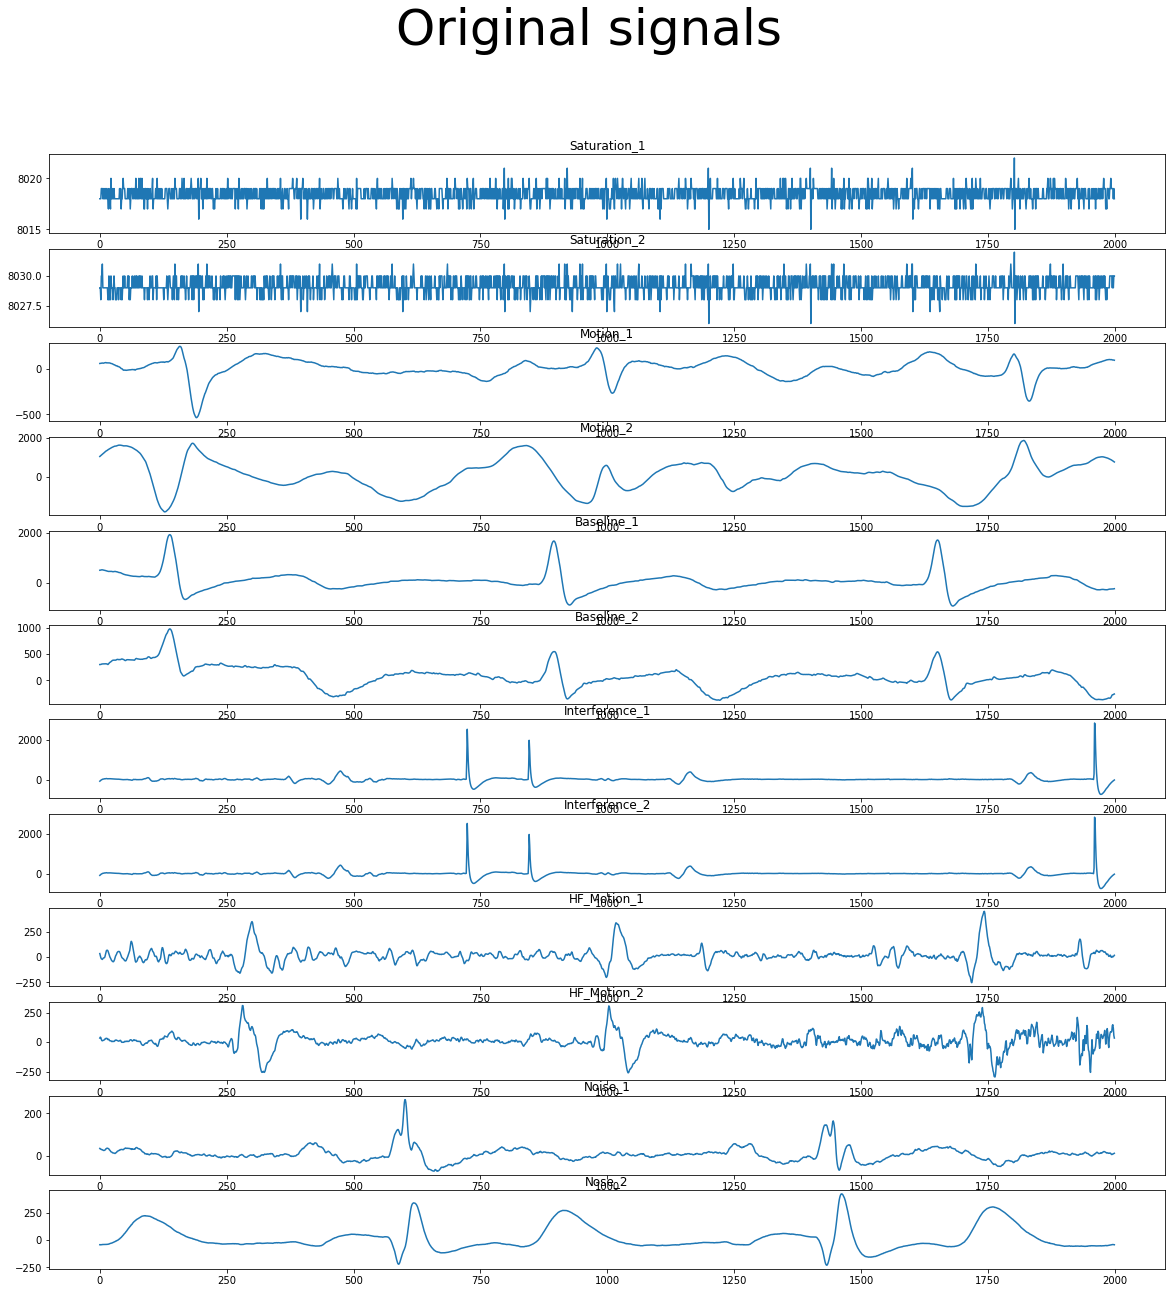

In [104]:
fig, axs = plt.subplots(12, 1)
fig.set_size_inches(20, 20.5)
for i in range(12):
    axs[i].plot(df.iloc[:,i])
    axs[i].set_title(df.columns[i])
    fig.suptitle('Original signals', fontsize=50)


### Filtering

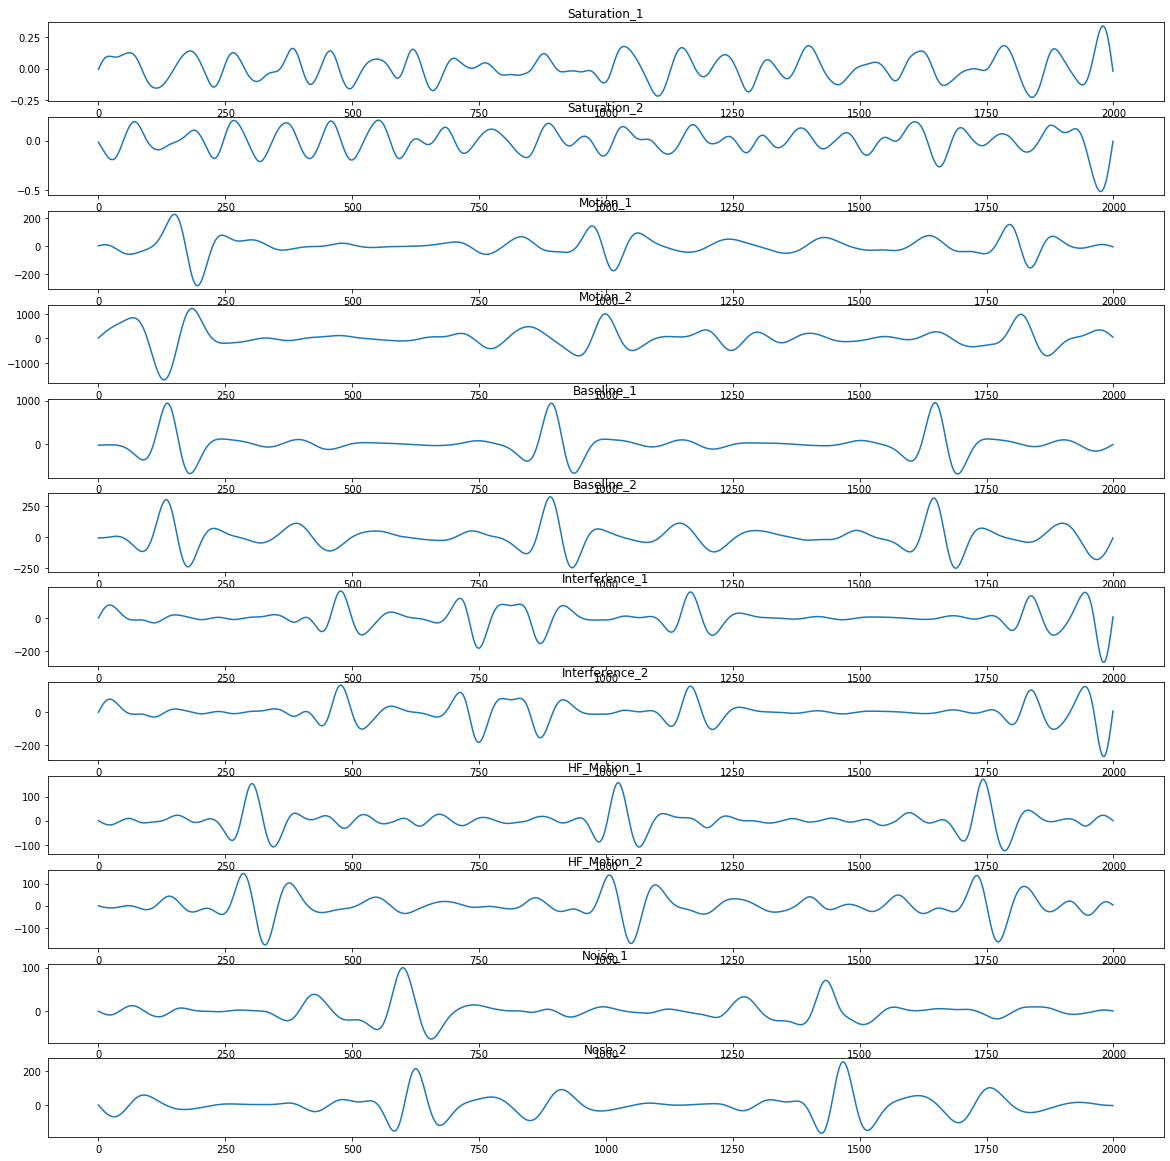

In [36]:
df_filter = df.copy()
fig, axs = plt.subplots(12, 1)
fig.set_size_inches(20, 20.5)
for i in range(12):
    new = _filtering(df.iloc[:,i], 1000)
    df_filter[df.columns[i]] = new
    axs[i].plot(new)
    axs[i].set_title(df.columns[i])
    fig.suptitle('Filtering', fontsize=50)


### Differentiation + Squaring

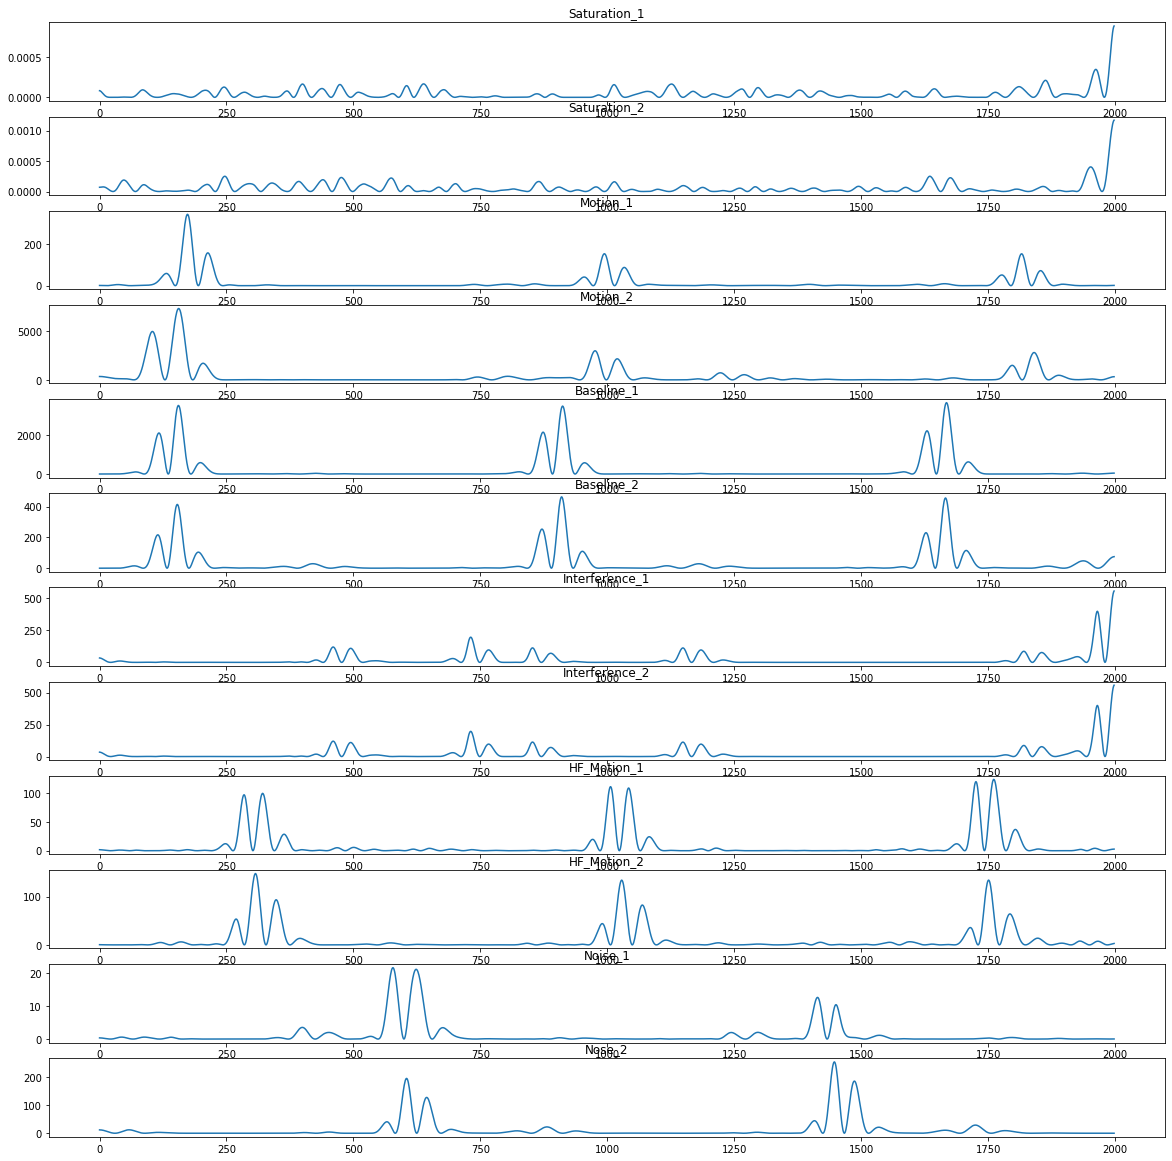

In [37]:
df_diff = pd.DataFrame()
fig, axs = plt.subplots(12, 1)
fig.set_size_inches(20, 20.5)
for i in range(12):
    new = _squaring(_differentiation(df_filter.iloc[:,i]))
    df_diff[df.columns[i]] = new
    axs[i].plot(new)
    axs[i].set_title(df.columns[i])
    
del df_filter

### Integration

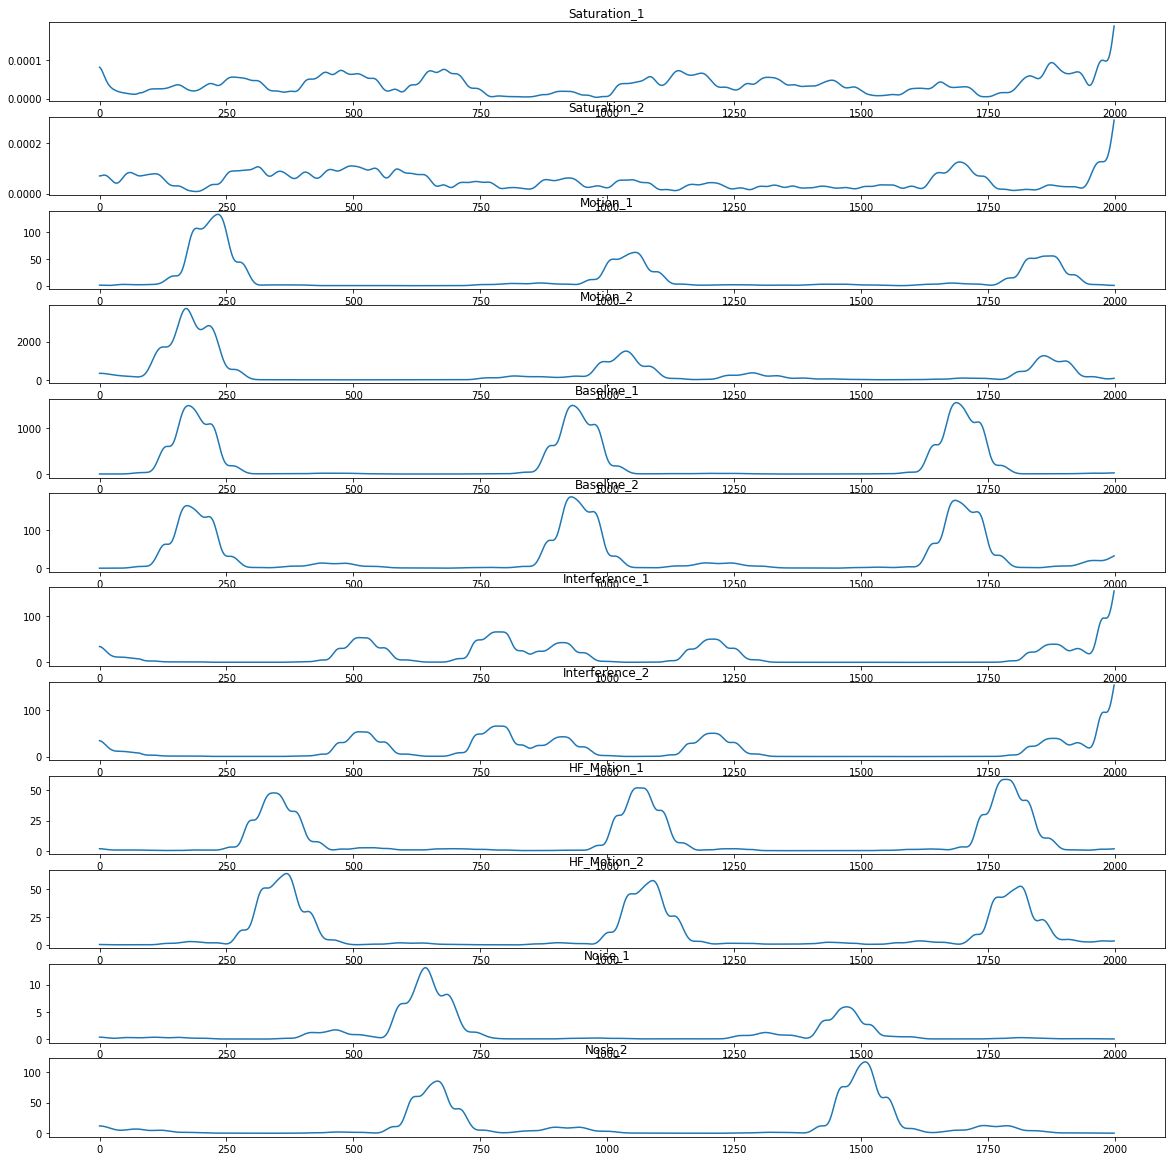

In [53]:
#df_int = pd.DataFrame()
fig, axs = plt.subplots(12, 1)
fig.set_size_inches(20, 20.5)
for i in range(12):
    new = _integration((df_diff.iloc[:,i]).to_numpy(), 1000)
    #df_int[df.columns[i]] = new
    axs[i].plot(new)
    axs[i].set_title(df.columns[i])
    
del df_filter

### Peak detection + correction

[ 613 1199]
[]
[1010 1831]
[ 998 1821]
[ 895 1651]
[ 895 1651]
[ 474 1163]
[ 474 1163]
[ 300 1017 1743]
[ 320 1041 1763]
[ 601 1445]
[ 618 1461]


C:\Users\thefr\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\thefr\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


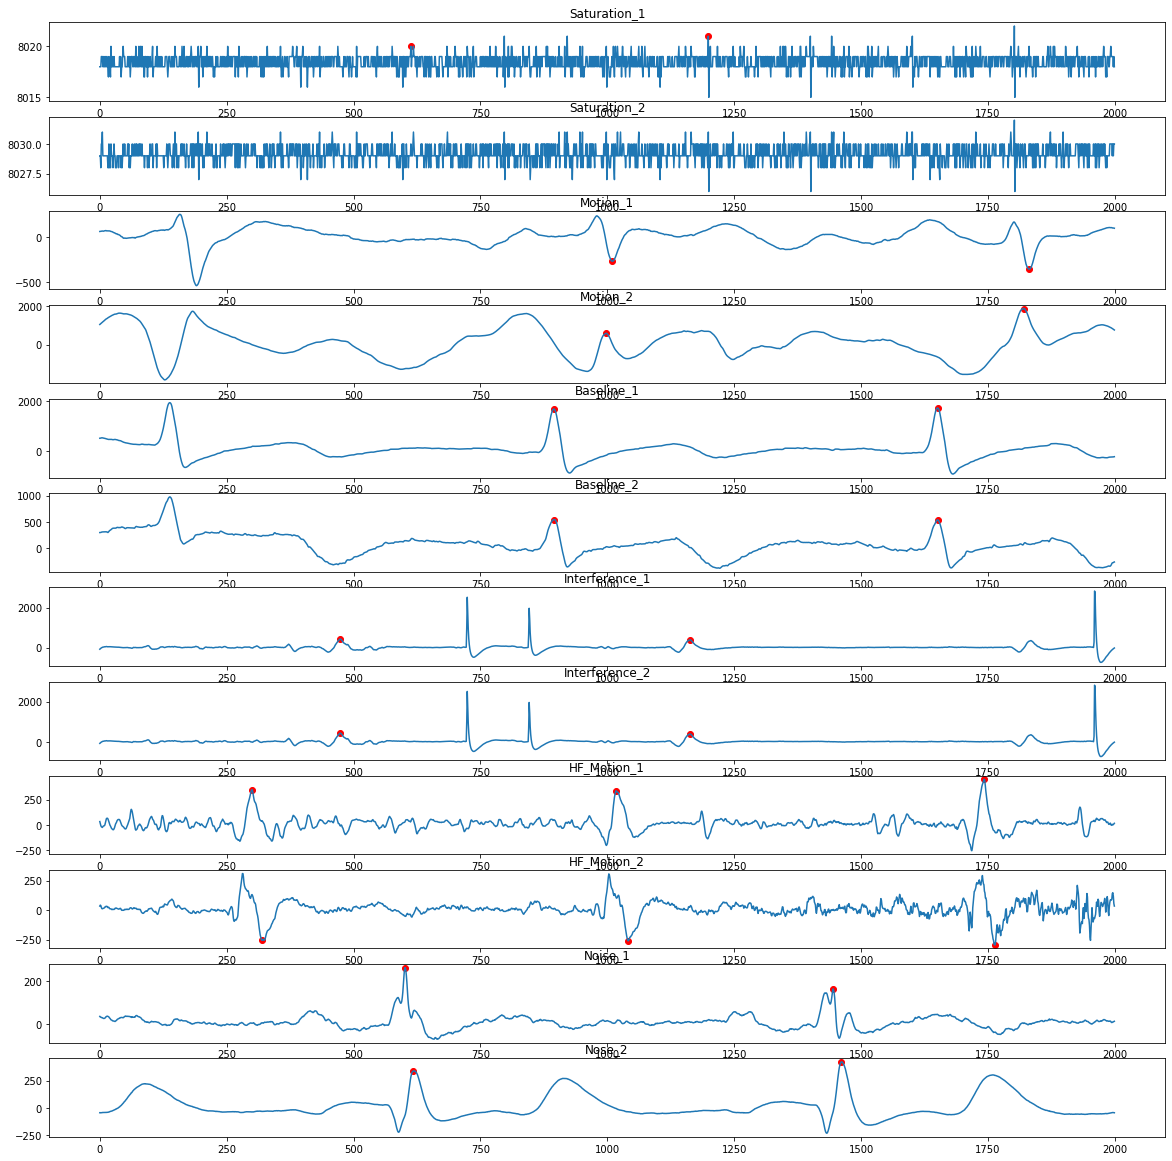

In [80]:
fig, axs = plt.subplots(12, 1)
fig.set_size_inches(20, 20.5)

for i in range(12):
    signal = df.iloc[:,i]
    new = _pantompkins((signal).to_numpy(), 1000)

    # Plotting the peaks against the original signal
    x_data = signal.index
    y_values = []
    for point in new:
        value = np.interp(point, x_data, signal)
        y_values.append(value)
    axs[i].scatter(new,y_values,marker='o',c='red')
    axs[i].plot(signal)
    axs[i].set_title(df.columns[i])

### Conclusions
- peaks are incorrectly detected in cases of saturation
- peaks are not detected in cases of motion artefacts, baseline wander, interference
- more accurate at detecting peaks in instances of general noise and HF motion
- Baseline correctly removed in PT algorithm, first peak may not be detected because this is the start of the 

In the future:
- Look at the start of the signal, is the PT algorithm just bad at detecting the early peak?

## Part 2: Applying PT algorithm to snippets

In [3]:
# Loading snippets
df = pd.read_csv ('./database/new_ecg_data/unclean.csv')
df = df.dropna(axis = 0, how = 'all')

### R-R Intervals for original moving windows algorithm

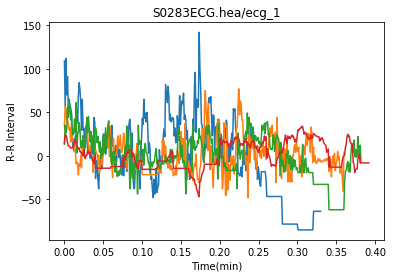

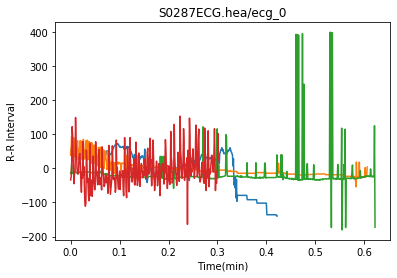

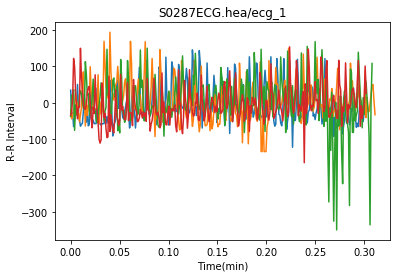

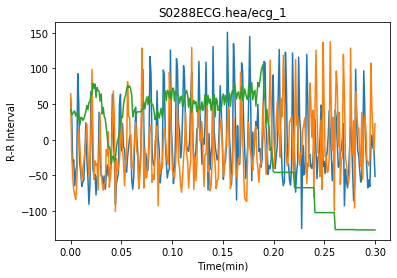

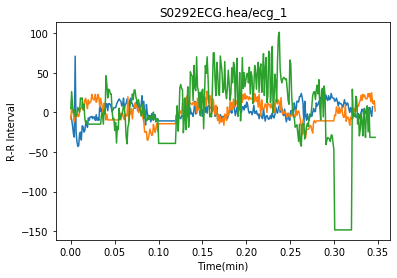

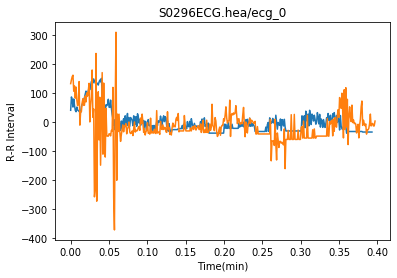

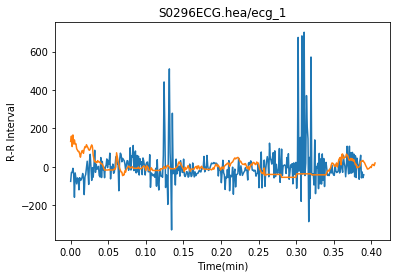

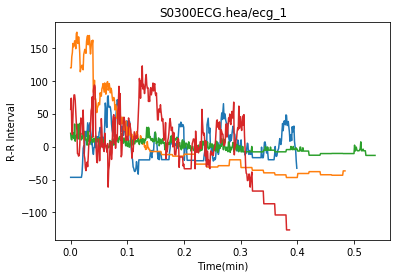

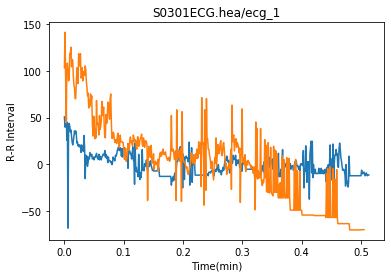

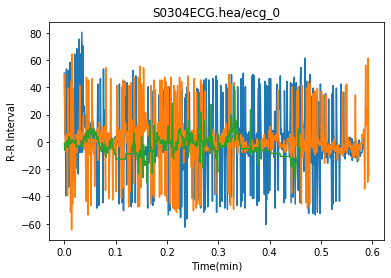

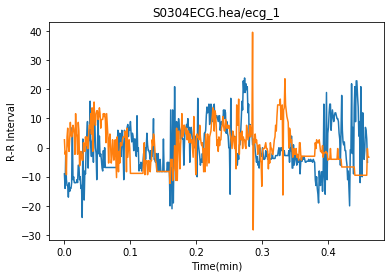

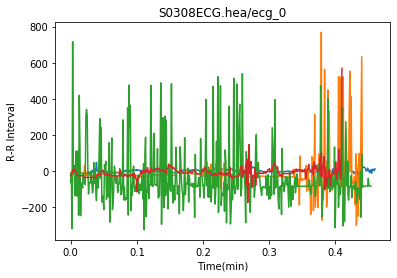

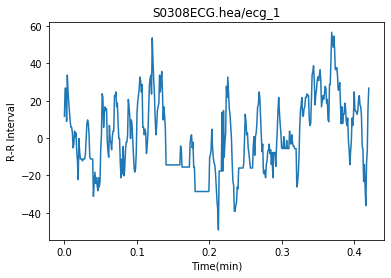

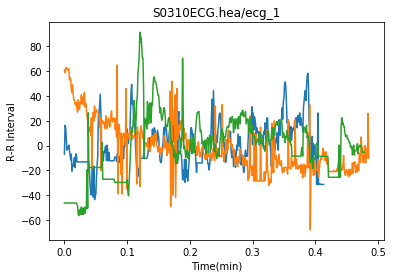

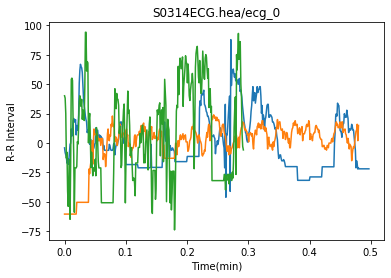

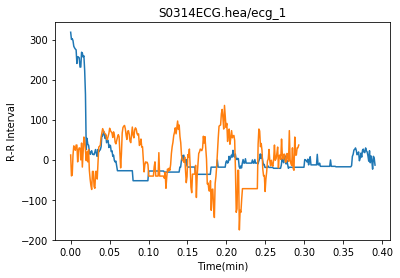

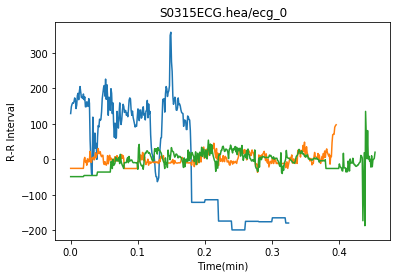

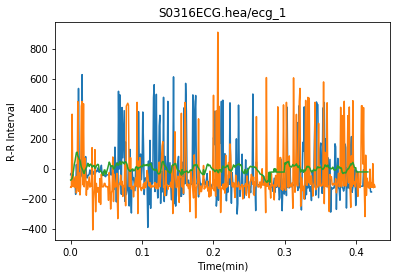

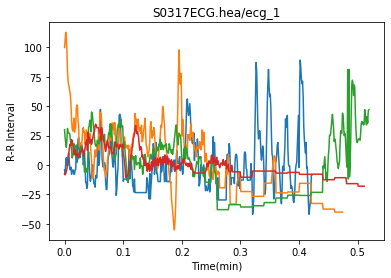

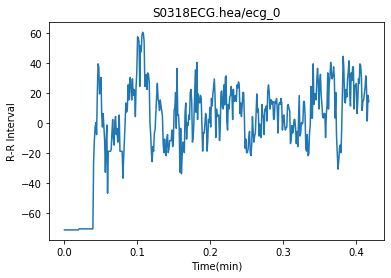

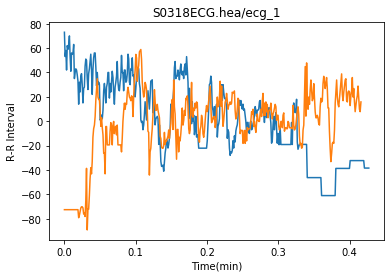

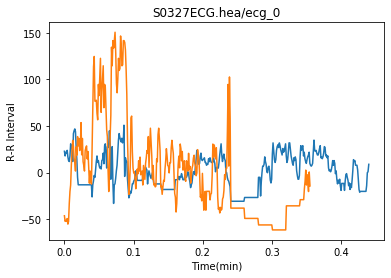

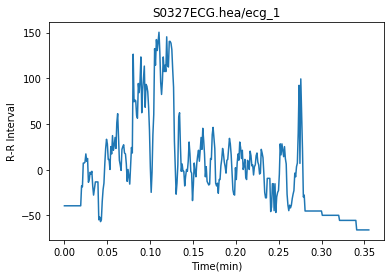

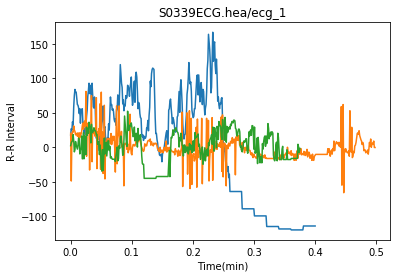

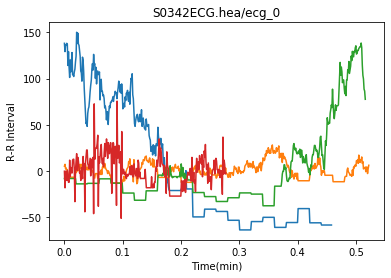

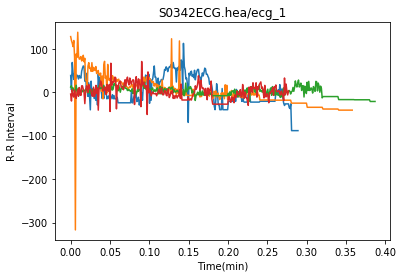

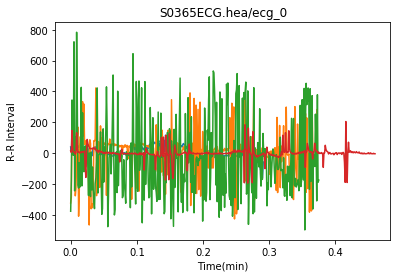

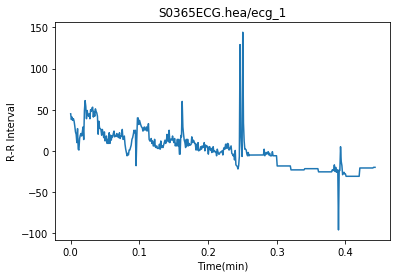

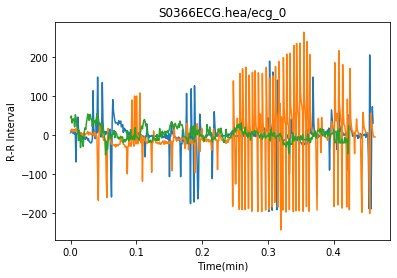

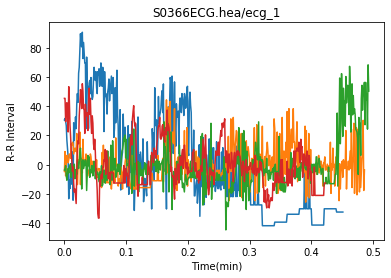

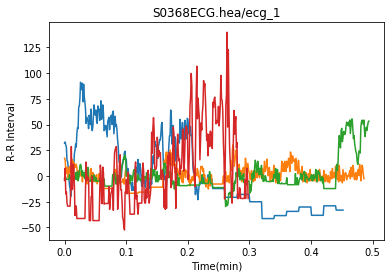

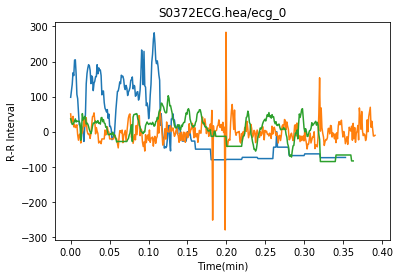

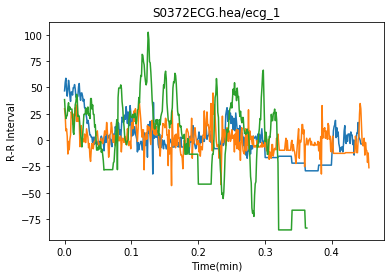

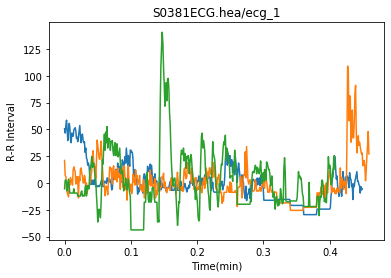

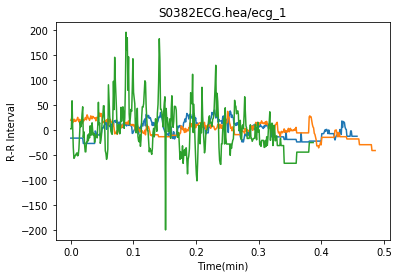

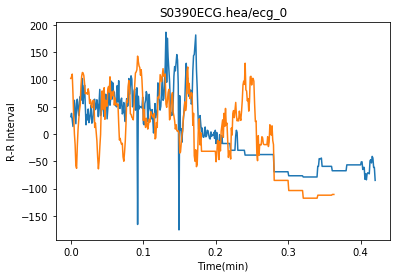

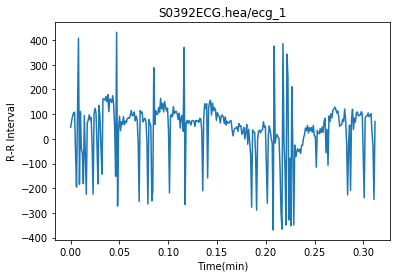

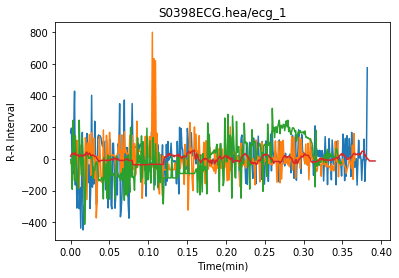

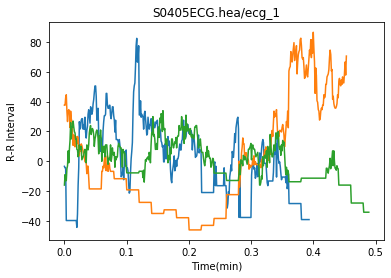

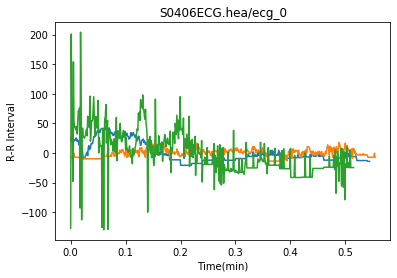

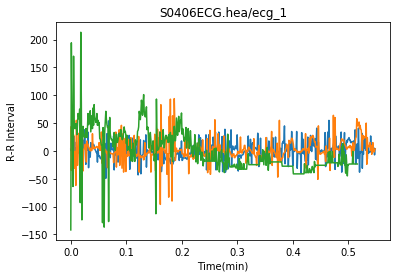

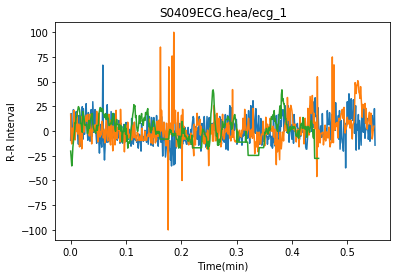

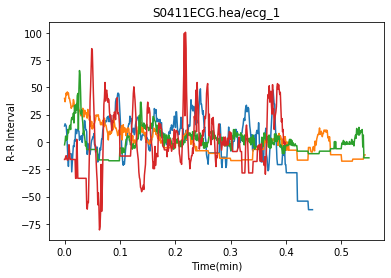

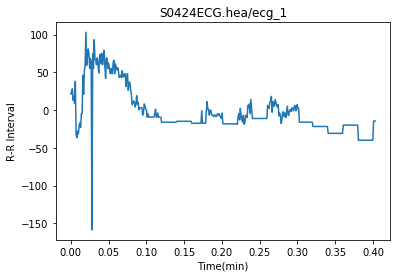

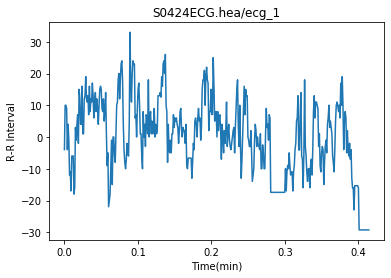

In [122]:
# Plotting the HRV readings
#Blue is snippet 1, orange snippet 2, green 3, red 4
column = df.columns[0]
for col in df:
    signal = df[col]
    peaks = _pantompkins((signal).to_numpy(), 1000)

    # Plotting the peaks against the original signal
    _hrvreading(peaks)
    plt.title(col[0:-2])
    if column[0:-2] != col[0:-2]: #All the sections from the same signal in the same plot
        plt.show()
    column = col

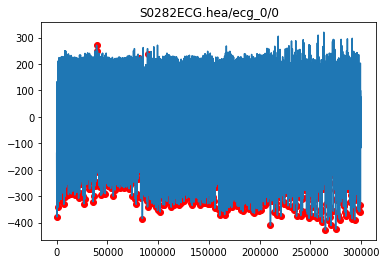

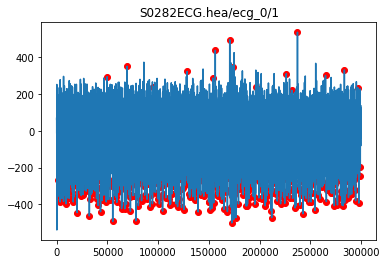

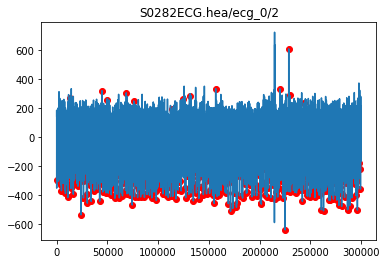

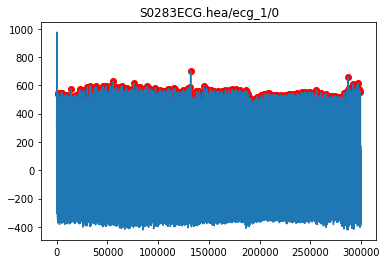

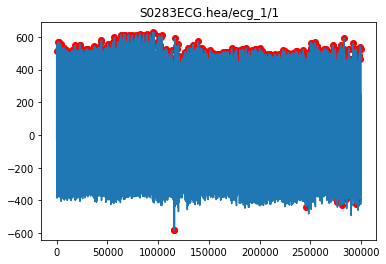

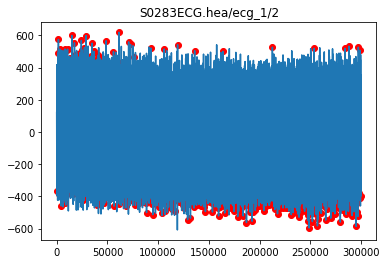

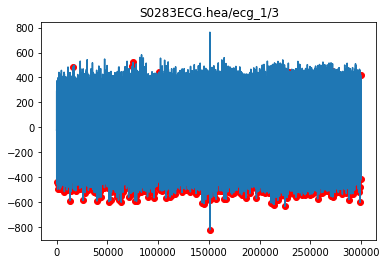

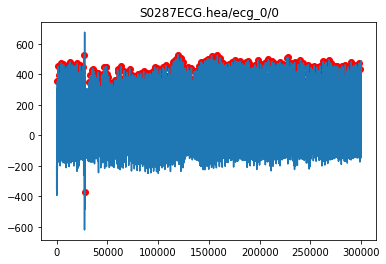

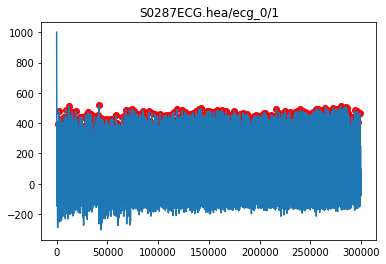

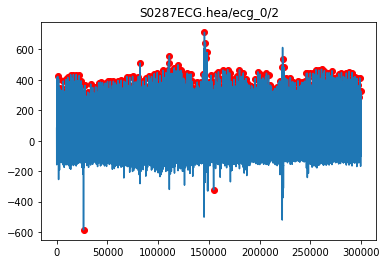

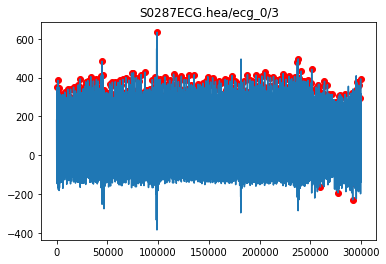

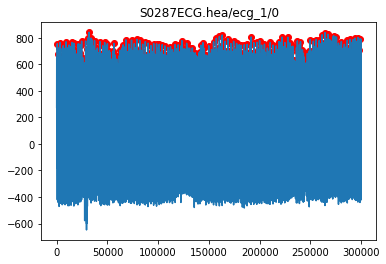

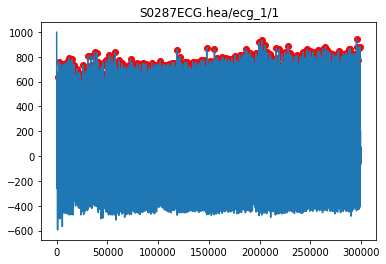

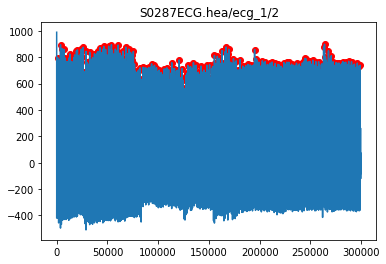

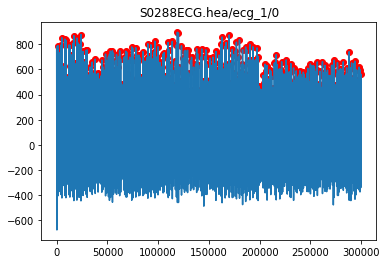

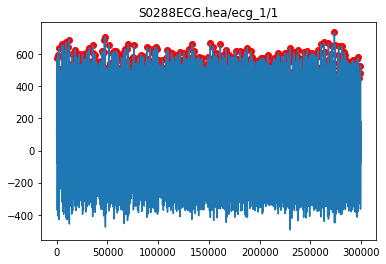

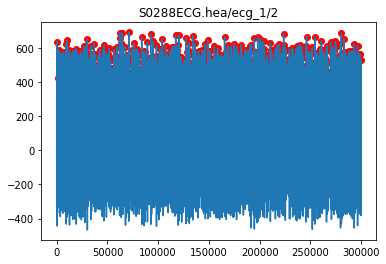

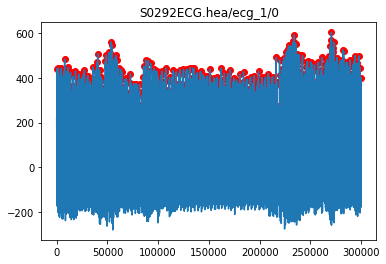

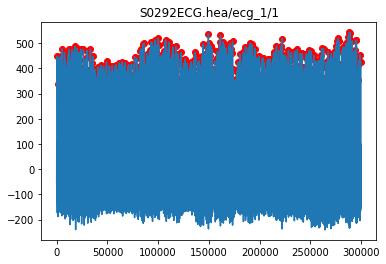

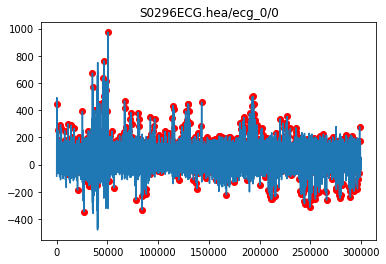

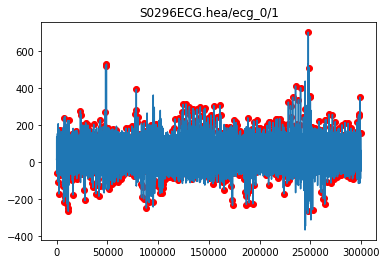

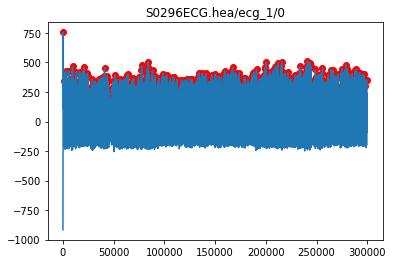

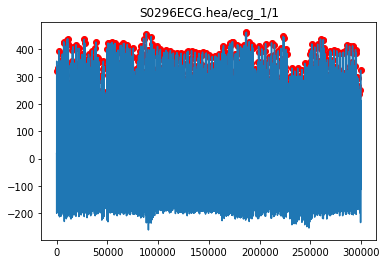

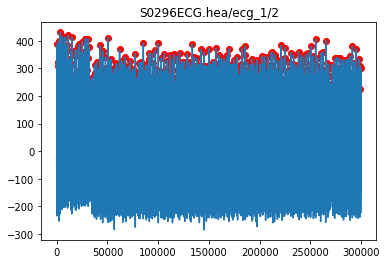

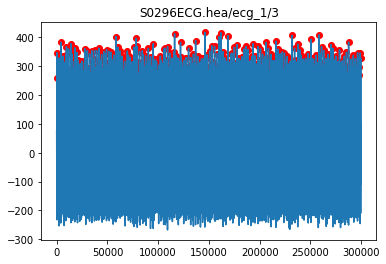

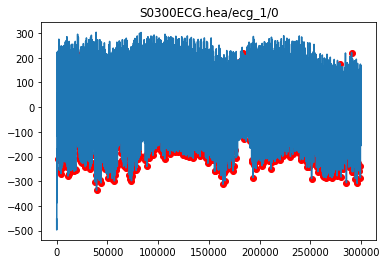

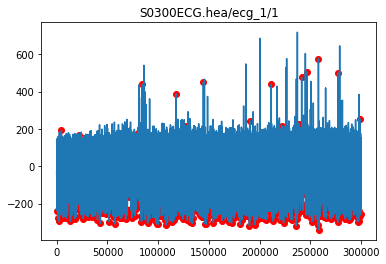

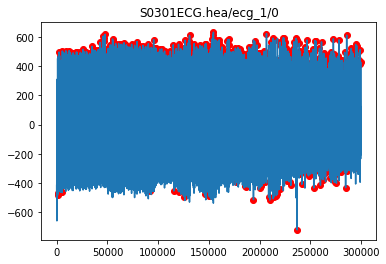

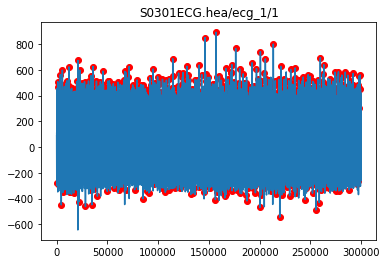

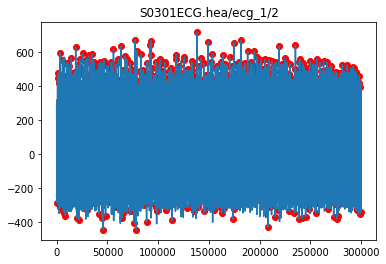

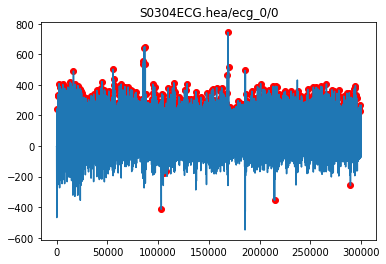

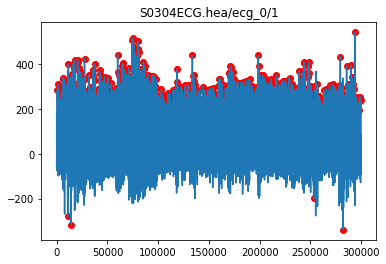

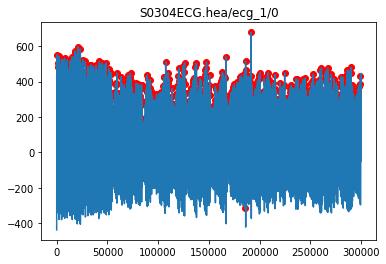

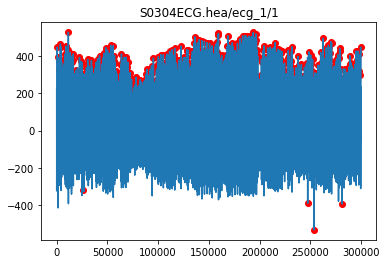

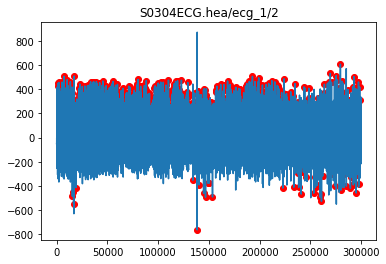

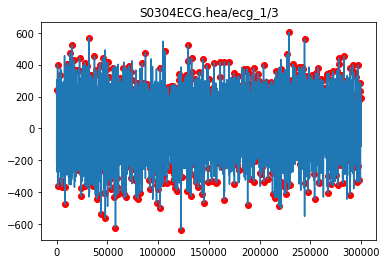

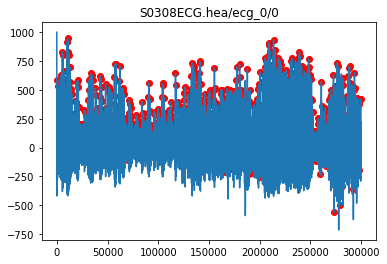

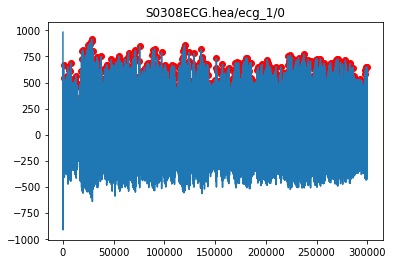

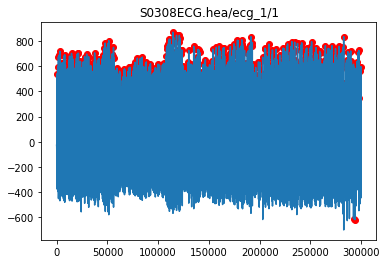

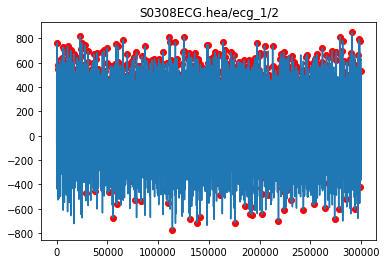

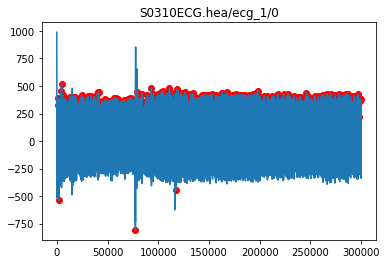

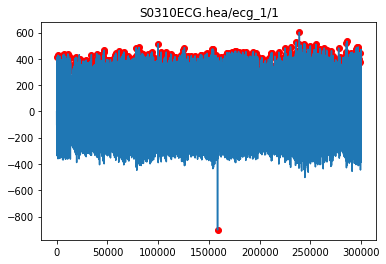

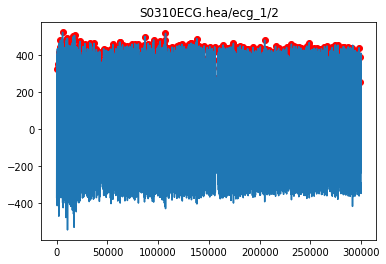

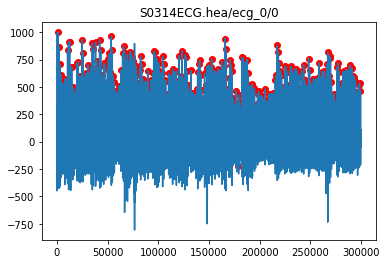

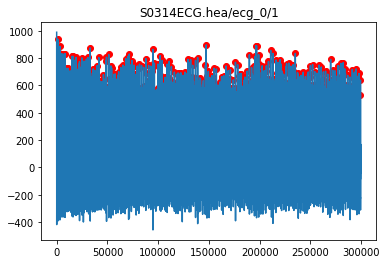

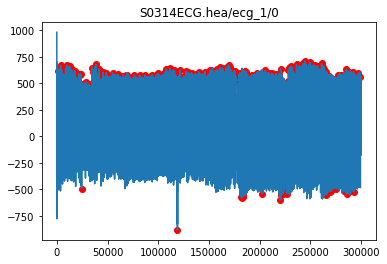

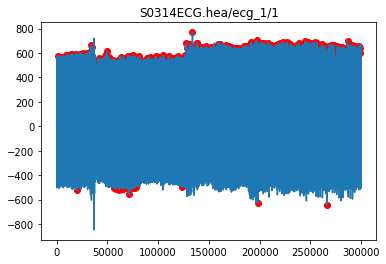

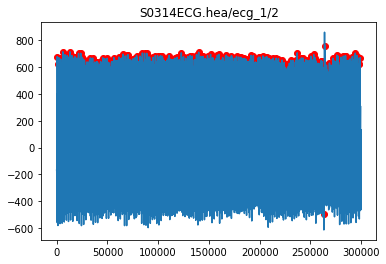

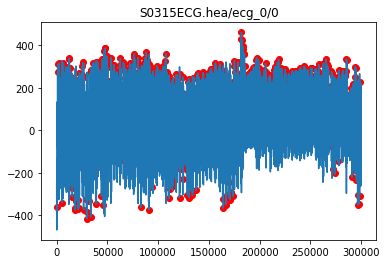

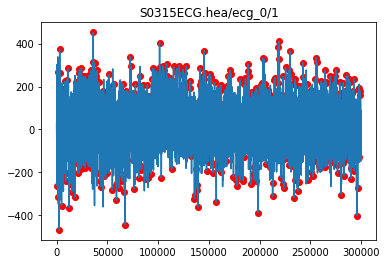

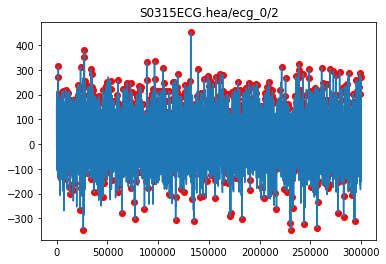

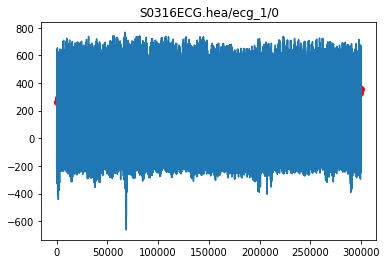

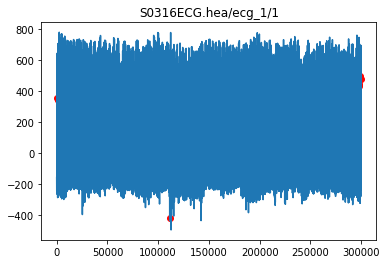

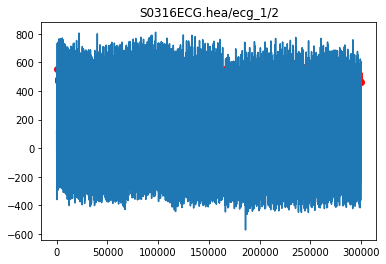

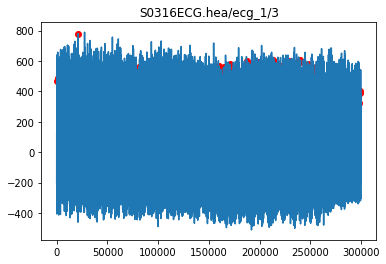

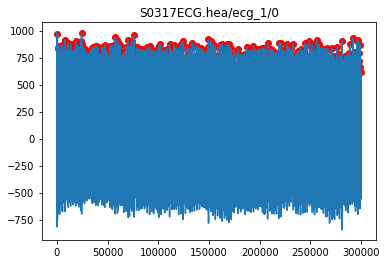

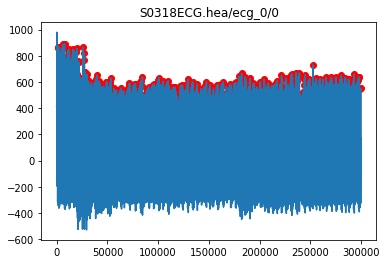

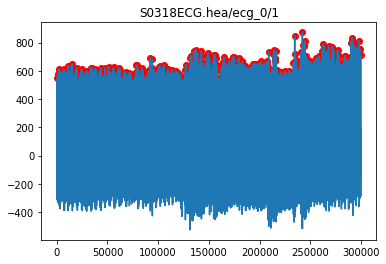

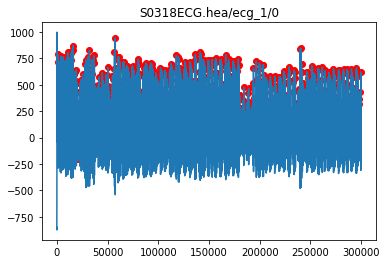

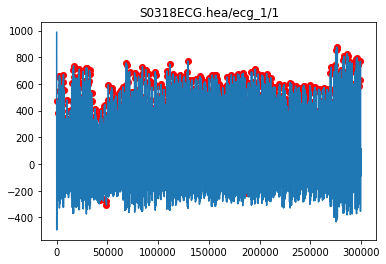

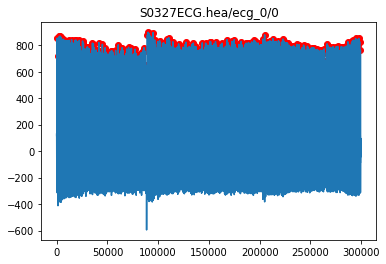

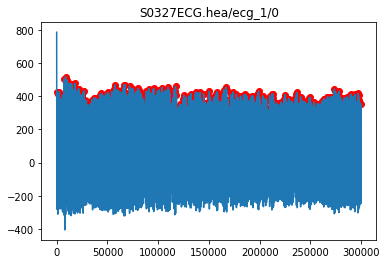

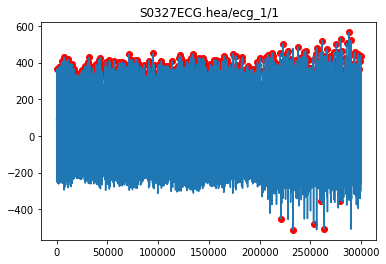

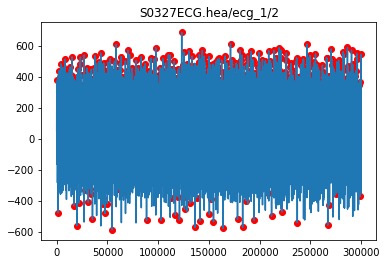

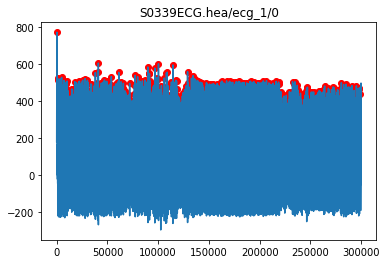

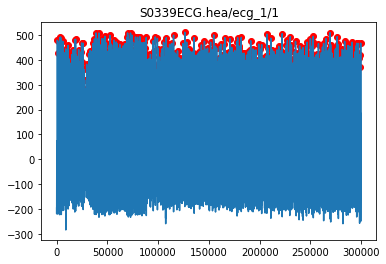

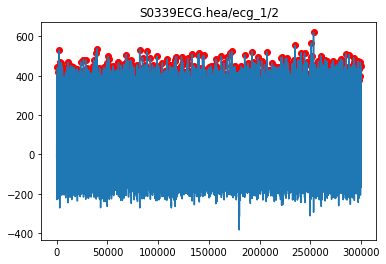

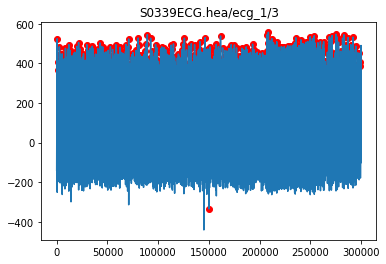

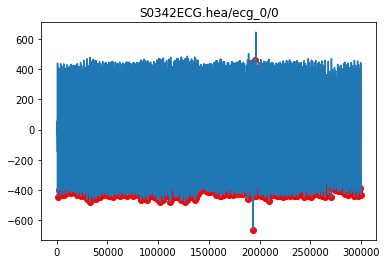

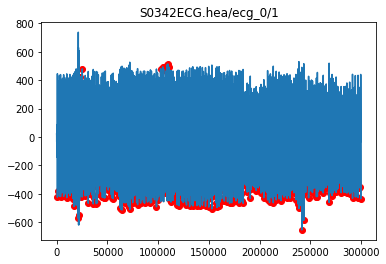

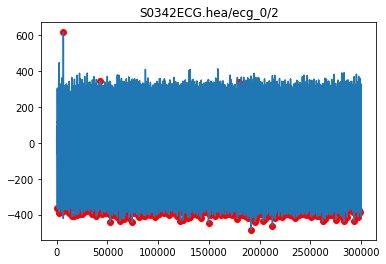

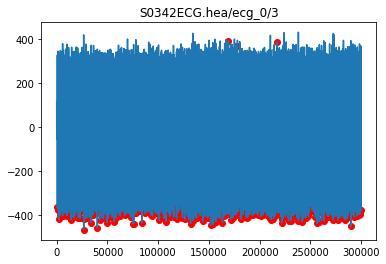

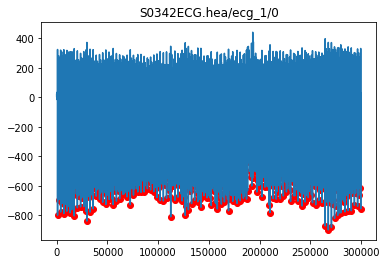

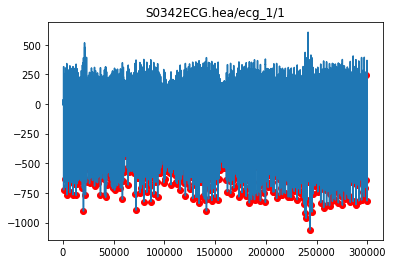

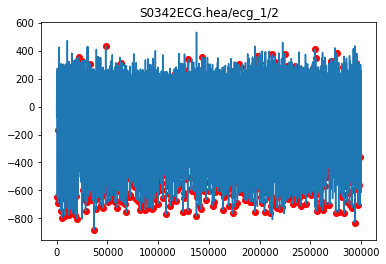

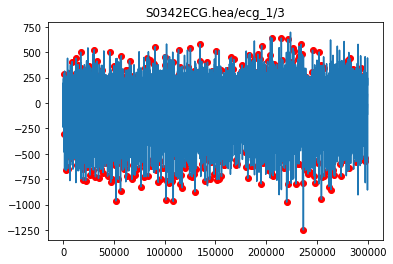

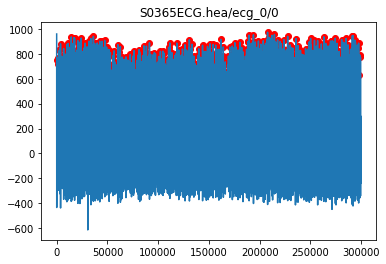

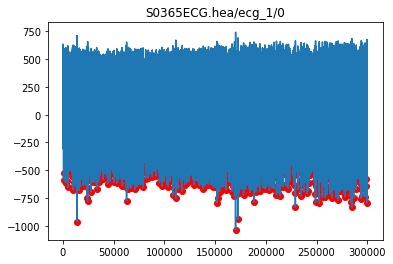

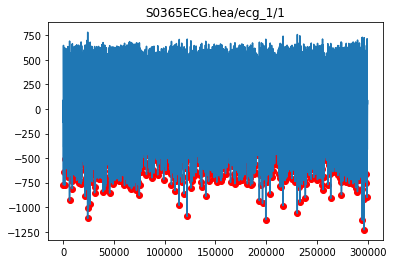

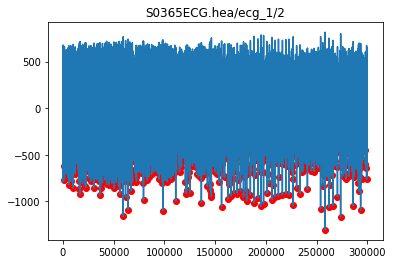

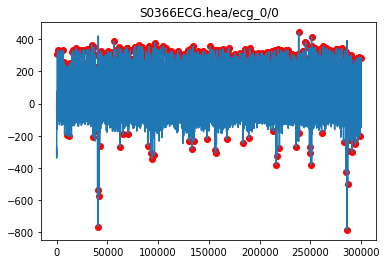

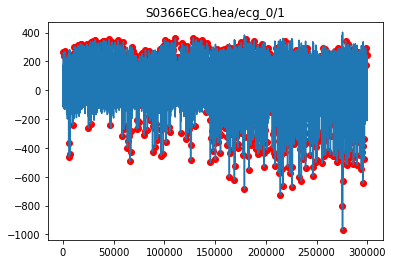

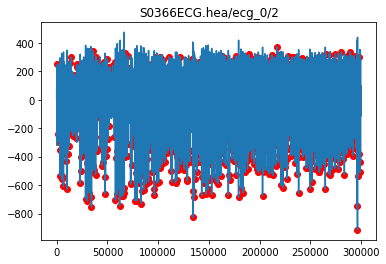

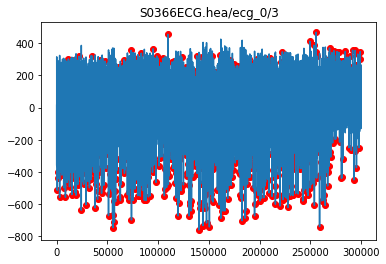

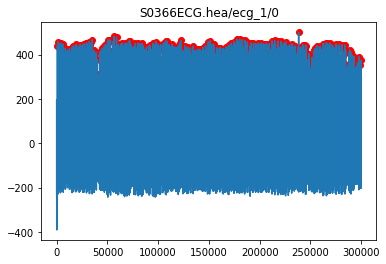

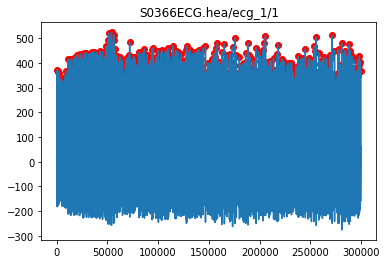

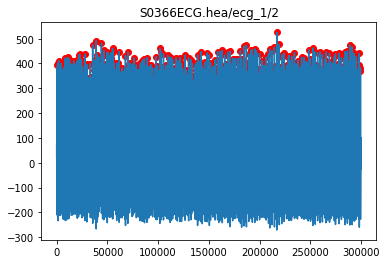

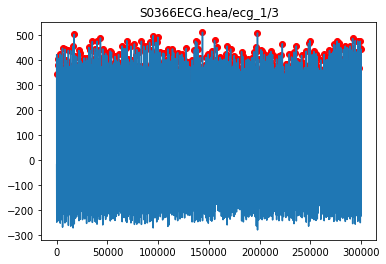

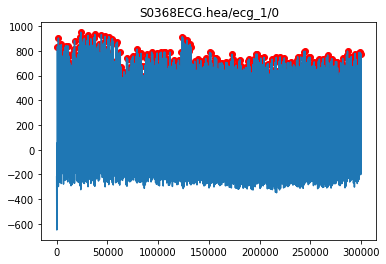

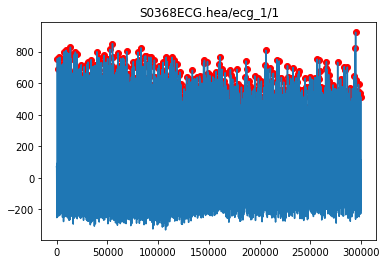

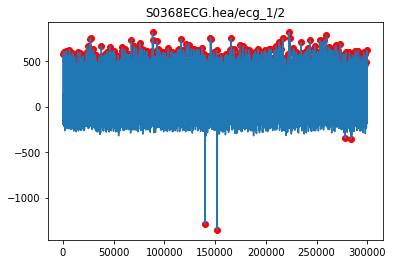

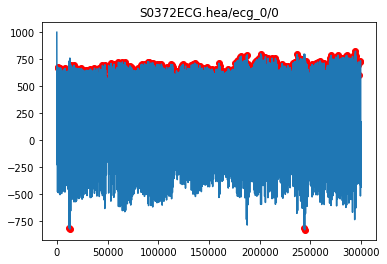

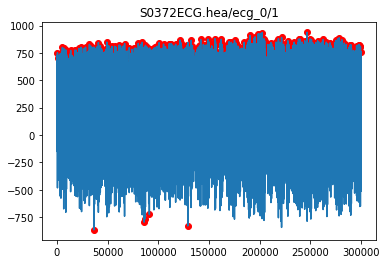

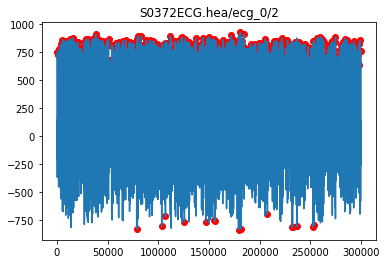

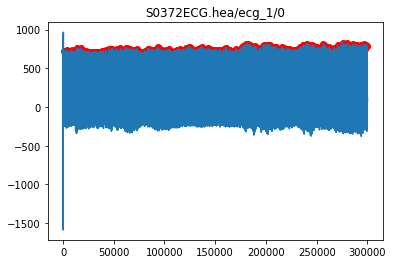

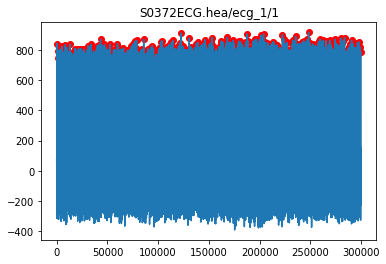

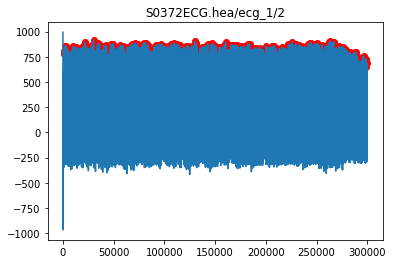

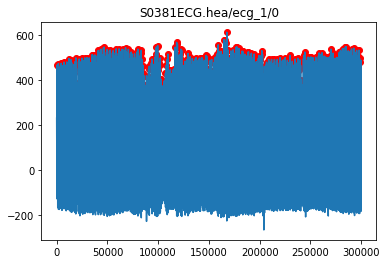

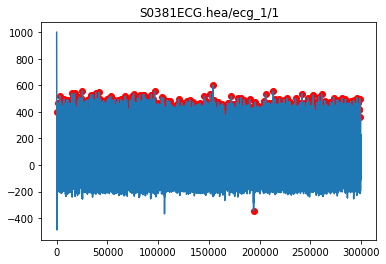

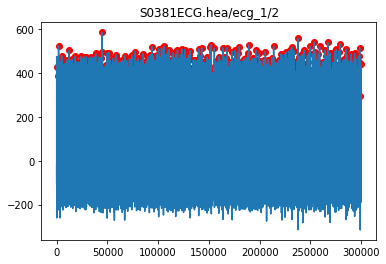

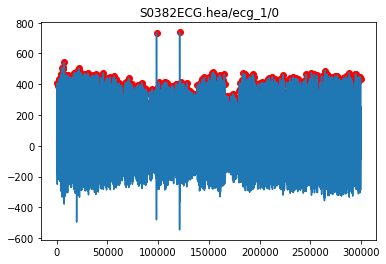

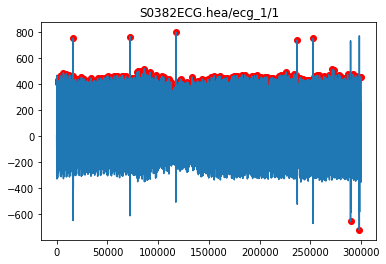

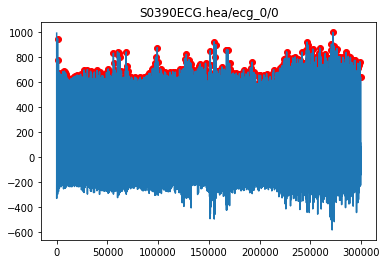

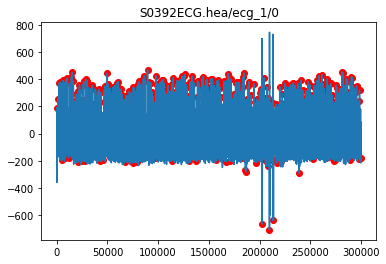

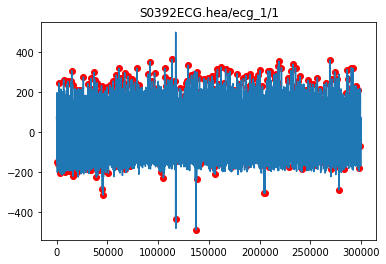

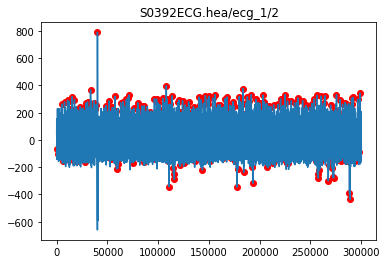

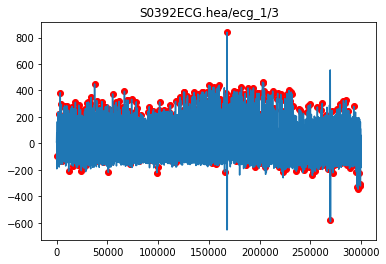

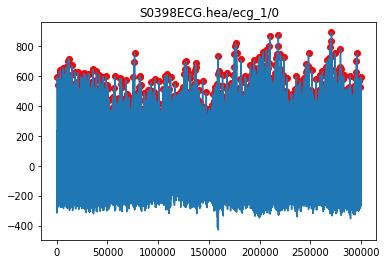

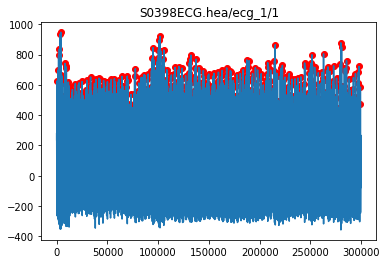

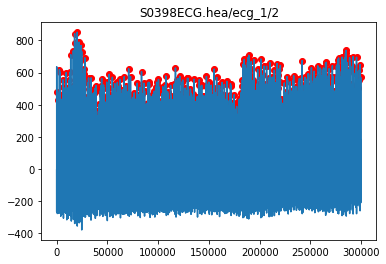

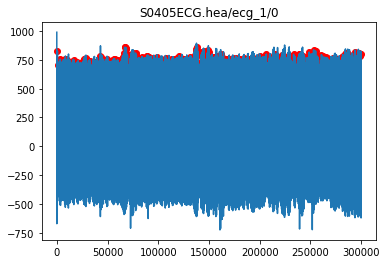

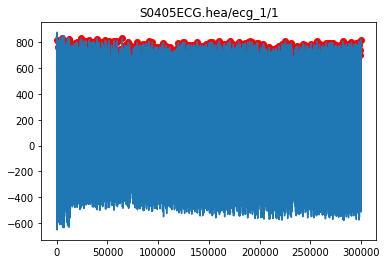

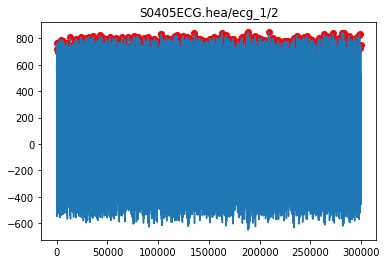

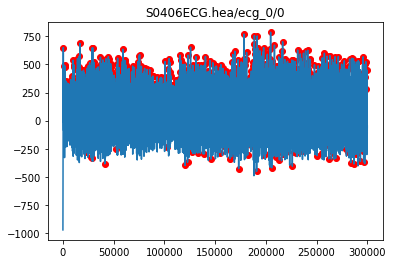

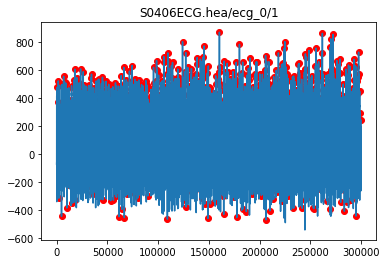

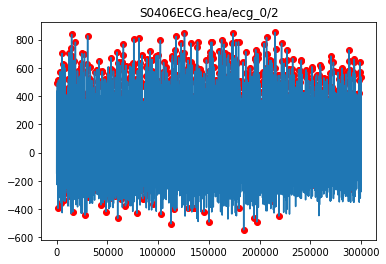

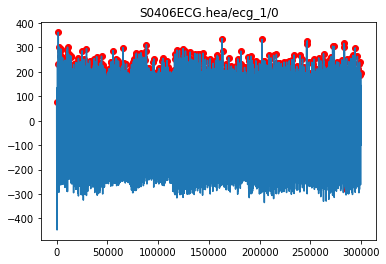

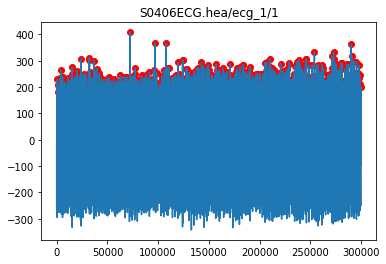

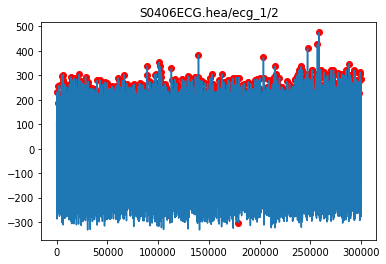

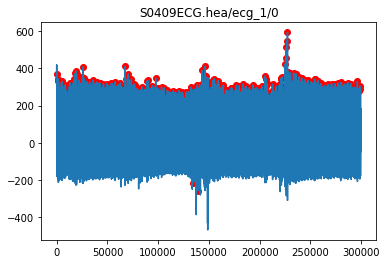

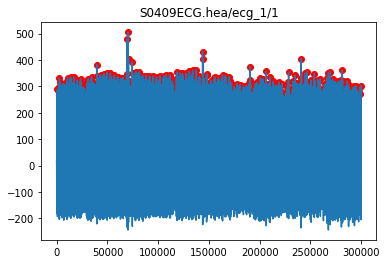

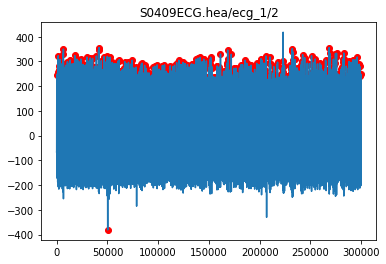

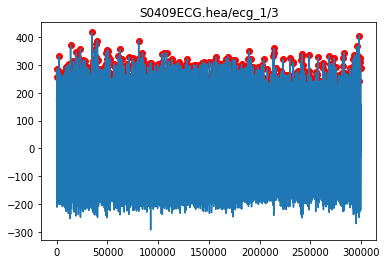

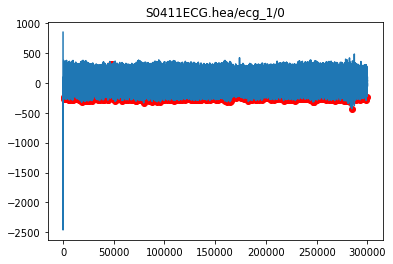

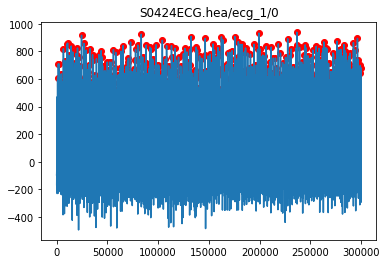

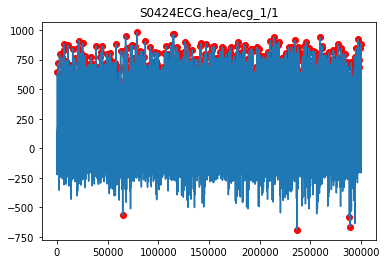

In [118]:
# Plotting the original signals and associated r-peaks
for col in df:
    signal = df[col]
    peaks = _pantompkins((signal).to_numpy(), 1000)
    
    # Plotting the peaks against the original signal
    x_data = signal.index
    y_values = []
    for point in peaks:
        value = np.interp(point, x_data, signal)
        y_values.append(value)
    #show_dic[col] = (peaks, y_values)

    plt.scatter(peaks,y_values,marker='o',c='red')
    plt.plot(signal)
    plt.title(col)
    plt.show()

In [1]:
#For interactive inline plotting
%matplotlib notebook
import matplotlib.pyplot as plt

In [1]:
#For plotting in popup - haven't got this to work yet
#%matplotlib tk
#import matplotlib.pyplot as plt

In [139]:
#For plain inline plotting
%matplotlib inline
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


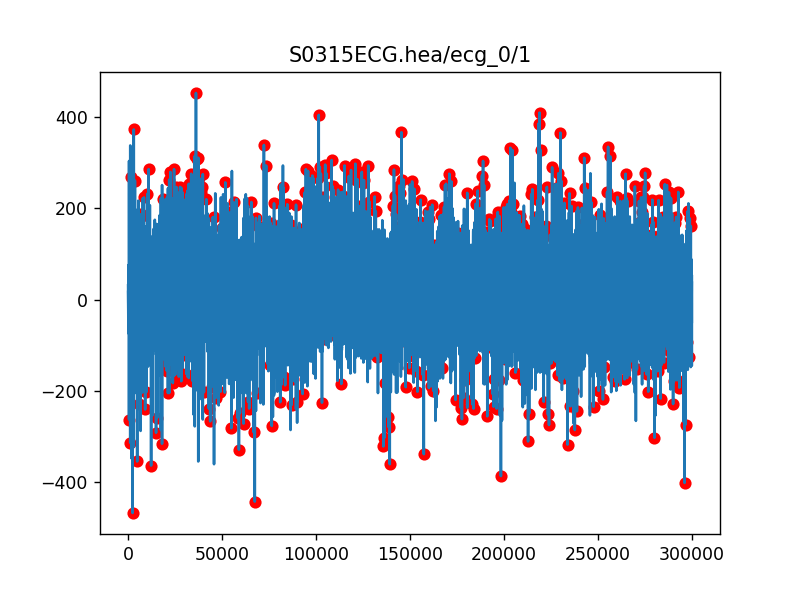

In [5]:
# Plot an interactive graph that you can zoom into
sample = "S0315ECG.hea/ecg_0/1"
signal = df[sample] # Select 
peaks = _pantompkins((signal).to_numpy(), 1000)
    
# Plotting the peaks against the original signal
x_data = signal.index
y_values = []
for point in peaks:
    value = np.interp(point, x_data, signal)
    y_values.append(value)
    
plt.scatter(peaks,y_values,marker='o',c='red')
plt.plot(signal)
plt.title(sample)
plt.show()